In [1]:
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler 

## Data Preparation

In [2]:
df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## Sample Distribution

In [46]:
n = 50
iteration = 1000
column = "tip"
mean_list = []
for i in range(iteration):
    samples = df[column].sample(n)
    mean_list.append(samples.mean())
print("mean", np.mean(df[column]))
print("var", np.var(df[column]))
print("var / n", np.var(df[column])/n)

mean 2.99827868852459
var 1.9066085124966412
var / n 0.038132170249932824


2.9995852000000003
0.029789803220960004


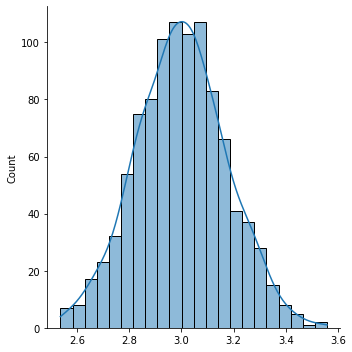

In [47]:
sns.displot(mean_list, kde=True)
print(np.mean(mean_list))
print(np.var(mean_list))

In [64]:
n = 1000
x = 2*np.random.randn(n) + 5
y = np.random.randn(n)
z = np.concatenate((x, y))

In [82]:
kde = stats.gaussian_kde(z)

In [92]:
z.mean()

2.535325499793993

In [87]:
n = 100
iteration = 10000
mean_list = []
for i in range(iteration):
    samples = kde.resample(n)
    mean_list.append(np.mean(samples))

In [90]:
np.mean(mean_list)
sns.displot(mean_list)

2.5342100858777497

## Unbiased Variance

In [93]:
stats.tvar(df["tip"])

1.914454638062471

In [96]:
np.sqrt(np.var(df["tip"], ddof=1))

1.3836381890011822

In [97]:
stats.tstd(df["tip"])

1.3836381890011822

## Unbiasedness of unbiased variance

In [112]:
n = 50
iteration = 10000
column = "tip"
var_list = []
tvar_list = []
for i in range(iteration):
    samples = df[column].sample(n)
    var_list.append(np.var(samples))
    tvar_list.append(stats.tvar(samples))
print("mean", np.mean(df[column]))
print("var", np.var(df[column]))

mean 2.99827868852459
var 1.9066085124966412


1.9161362991673472


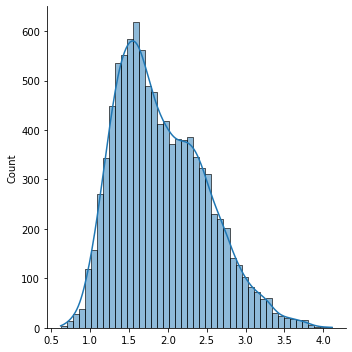

In [113]:
sns.displot(tvar_list, kde=True)
print(np.mean(tvar_list))

1.877813573184


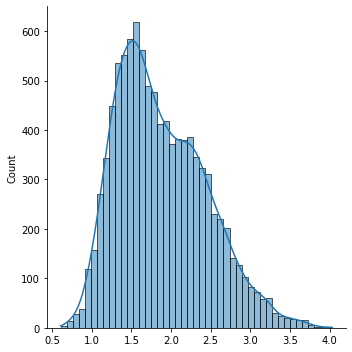

In [114]:
sns.displot(var_list, kde=True)
print(np.mean(var_list))

## Interval Estimation (ratio)

In [183]:
n = 50
iteration = 100
column = "sex"
value = "Male"
alpha = 0.95

population_ratio = (df[column]==value).sum()/df.shape[0]
results = []
for _ in range(iteration):
    samples = df[column].sample(n)
    sample_ratio = (samples==value).sum()/n
    min_num, max_num = stats.binom.interval(alpha, n, sample_ratio)
    min_ratio = min_num / n
    max_ratio = max_num / n
    correct = min_ratio < population_ratio < max_ratio
    results.append({"min": min_ratio, "max":max_ratio, "correct":correct})
result_df = pd.DataFrame(results)
result_df["correct"].value_counts()[1]/iteration

0.95

## Interval Estimation (mean)

In [218]:
n = 50
iteration = 100
column = "tip"
alpha = 0.95

population_mean = df[column].mean()
results = []
for _ in range(iteration):
    samples = df[column].sample(n)
    sample_mean = samples.mean()
    sample_tvar = stats.tvar(samples)
    min_mean, max_mean = stats.norm.interval(alpha, sample_mean, np.sqrt(sample_tvar/n))
    correct = min_mean < population_mean < max_mean
    results.append({"min": min_mean, "max":max_mean, "correct":correct})
result_df = pd.DataFrame(results)
# result_df["correct"].value_counts()[1]/iteration
result_df["correct"].value_counts()

True     95
False     5
Name: correct, dtype: int64

## t distribution

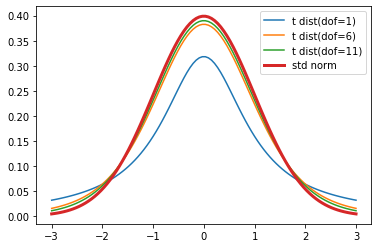

In [236]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label="std norm", linewidth=3)
plt.legend()

## Interval Estimation (mean) (std norm vs. t distribution)

In [247]:
sample_mean

2.885

In [250]:
n = 50
iteration = 100
column = "tip"
alpha = 0.95

population_mean = df[column].mean()
samples = df[column].sample(n)
sample_mean = samples.mean()
sample_tvar = stats.tvar(samples)
min_val_norm, max_val_norm = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_tvar/n))
min_val_t, max_val_t = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_tvar/n), df=n-1)
print(min_val_norm, max_val_norm)
print(min_val_t, max_val_t)

2.6444663322909188 3.3351336677090826
2.6357251334527194 3.343874866547282
